# Vecinos más próximos


## Introducción

En este Notebook vamos a analizar el funcionamiento del algoritmo [vecinos más próximos](http://scikit-learn.org/stable/modules/neighbors.html) .


## Vecinos más próximos (k-nn)

Del inglés, *K-Nearest Neighbors*. Es un algoritmo que puede utilizarse tanto para regresión como para clasifiación. 

Conceptualmente, es muy sencillo: sea una observación $x_0$ (en verde en la figura), de la que queremos predecir a qué clase pertenece. Se identifican las $k$ muestras vecinas más cercanas a $x_0$, y se le asigna la clase más popular entre las muestras vecinas (*majority vote*):

<img src="./figs/KnnClassification.png"> Fuente: [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

* Si $k=3$ (la vecindad viene marcada por la circunferencia de línea sólida), entonces $x_0$ se asigna a la clase triángulo rojo.

* Si $k=5$ (la vecindad viene marcada por la circunferencia de línea punteada), entonces $x_0$ se asigna a la clase cuadrado azul.

In [4]:
# cargamos librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [7]:
db = pd.read_csv("ohlcdata.csv")
db= db.dropna()

In [10]:
db.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2009-03-31,17.83,18.79,17.78,18.37,92095500,17.81
1,2009-03-30,17.74,17.76,17.27,17.48,49633000,16.95
2,2009-03-27,18.54,18.62,18.05,18.13,47670400,17.58
3,2009-03-26,18.17,18.88,18.12,18.83,63775100,18.26
4,2009-03-25,17.98,18.31,17.52,17.88,73927100,17.34
5,2009-03-24,18.04,18.21,17.84,17.93,50044100,17.39
6,2009-03-23,17.37,18.59,17.31,18.33,71600000,17.77
7,2009-03-20,17.32,17.65,16.88,17.06,81725500,16.54
8,2009-03-19,17.37,17.45,16.92,17.14,58994600,16.62
9,2009-03-18,17.03,17.22,16.60,16.96,70710700,16.45


In [9]:
db.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

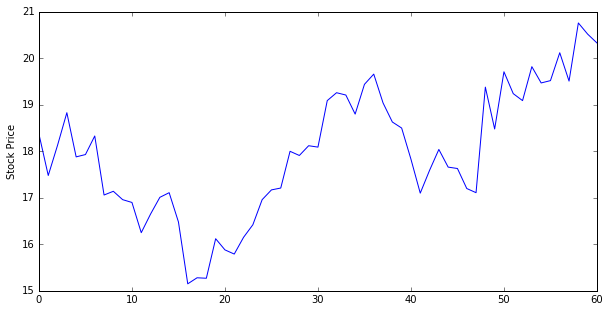

In [11]:
db.Close.plot(figsize=(10,5))
plt.ylabel("Stock Price")
plt.show()

In [13]:
y = np.where(db['Close'].shift(-1) > db['Close'],1,-1)
db['Open-Close'] = db.Open - db.Close
db['High-Low'] = db.High - db.Low

In [16]:
X=db[['Open-Close','High-Low']]
split_percentage = 0.8
split = int(split_percentage*len(db))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [18]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))



Train Accuracy: 87.50%
Test Accuracy: 92.31%


**Número de vecinos**

Podemos modificar el número de vecinos $k$ del algoritmo k-nn implementado en scikit-learn mediante el parámetro *n_neighbors*. Por defecto, scikit-learn toma *n_neighbors* $=5$

El número de vecinos que escojamos afecta significativamente a las prestaciones del algoritmo. Este parámetro es un compromiso entre los errores que cometemos (*accuracy*) y la complejidad del modelo (frontera de separación). 

- Cuanto mayor es el número de vecinos, menor será el sobreajuste pero potencialmente también se tendrá peor *accuracy*.

- Cuanto menor es el número de vecinos, mayor será el sobreajuste pero potencialmente se mejorará la *accuracy*.

In [21]:
# Complejidad mínima (ANTES DE EJECUTAR TRATA DE PENSAR CÓMO SERÁ EL RESULTADO!)
# creamos el modelo y ajustamos


clf=neighbors.KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))



Train Accuracy: 81.25%
Test Accuracy: 100.00%


- Cuanto menor es el número de vecinos, mayor será el sobreajuste pero potencialmente se mejorará la *accuracy*.

In [24]:
# Complejidad alta
clf=neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 100.00%
Test Accuracy: 92.31%


## Conclusiones

El algoritmo k-nn destaca por:

1. Conceptualmente sencillo.
2. Normalmente proporciona buenas prestaciones donde la frontera de separación es muy irregular.
3. Computacionalmente intenso (hay que calcular la distancia entre todas las muestras).

** IMPORTANT**
Accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classication problems, it is also the most
misused. It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that all predictions and prediction errors are equally important,
which is often not the case.